<a href="https://colab.research.google.com/github/pedroohsilva/previsao-emissao-co2-veiculos-canada/blob/main/previsao_emissao_co2_veiculos_canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Emissões de CO₂ em Veículos no Canadá 2025
Neste projeto, utilizo um modelo de **Regressão Linear** para estimar as emissões de dióxido de carbono (CO₂) de veículos canadenses com base em suas características técnicas com dados reais.

### Objetivos:

- Fornecer insights úteis para análises ambientais
- Usar o Scikit-learn para implementar uma regressão linear simples
- Criar, testar e implementar um modelo de regressão linear com dados reais

**Fonte:** https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

---

### Entendendo os Dados:

​O conjunto de dados "Classificações de Consumo de Combustível de 2025" fornece informações detalhadas sobre o consumo de combustível de veículos no Canadá para o ano-modelo 2025. Os dados foram atualizados pela última vez em 25 de março de 2025 e estão disponíveis no Portal de Dados Abertos do Canadá.

- Ano do Modelo (Model year): Ano de fabricação do veículo.​

- Marca (Make): Fabricante do veículo.​

- Modelo (Model): Nome específico do modelo do veículo.​

- Classe do Veículo (Vehicle class): Categoria à qual o veículo pertence, como compacto, SUV, etc.​

- Tamanho do Motor (Engine size (L)): Capacidade volumétrica do motor em litros.​

- Número de Cilindros (Cylinders): Quantidade de cilindros no motor.​

- Transmissão (Transmission): Tipo de transmissão do veículo (por exemplo, automática ou manual).​

- Tipo de Combustível (Fuel type): Tipo de combustível utilizado pelo veículo (por exemplo, gasolina, diesel).​

- Consumo na Cidade (City (L/100 km)): Consumo de combustível em ambiente urbano, medido em litros por 100 quilômetros.​

- Consumo na Estrada (Highway (L/100 km)): Consumo de combustível em rodovias, medido em litros por 100 quilômetros.​

- Consumo Combinado (Combined (L/100 km)): Média ponderada do consumo de combustível na cidade e na estrada, em litros por 100 quilômetros.​

- Consumo Combinado em MPG (Combined (mpg)): Consumo combinado convertido para milhas por galão.​

- Emissões de CO₂ (CO2 emissions (g/km)): Quantidade de dióxido de carbono emitida pelo veículo, medida em gramas por quilômetro.​

- Classificação de CO₂ (CO2 rating): Avaliação da eficiência do veículo em termos de emissões de CO₂.​

- Classificação de Poluentes (Smog rating): Avaliação do impacto do veículo na formação de smog.​

Essas informações são essenciais para consumidores, pesquisadores e formuladores de políticas que buscam compreender e comparar a eficiência energética e o impacto ambiental dos veículos disponíveis no mercado canadense.

### Importação de Pacotes:

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importação de Dados:

In [37]:
df = pd.read_csv("/content/FuelConsumptionCo2.csv", encoding="latin1")
# Utilizei o parâmetro 'encoding para o Pandas conseguir decodificar corretamente os caracteres especiais presentes no arquivo CSV.

### Explorando os Dados:

In [38]:
print(f"O conjunto de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O conjunto de dados possui 648 linhas e 15 colunas.


In [40]:
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2025,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,6
1,2025,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,5
2,2025,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,5
3,2025,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,4
4,2025,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,4


In [41]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,648.0,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,2025.0,2.959877,5.350309,11.995525,9.184722,10.732716,28.222222,251.671296,4.638889,4.936728
std,0.0,1.199431,1.813346,3.382516,2.178715,2.783076,8.081501,64.676307,1.328268,1.329958
min,2025.0,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2025.0,2.000000,4.000000,9.700000,7.600000,8.800000,23.000000,206.000000,4.000000,4.000000
50%,2025.0,2.500000,4.000000,11.900000,9.000000,10.600000,27.000000,250.000000,5.000000,5.000000
75%,2025.0,3.500000,6.000000,14.025000,10.500000,12.500000,32.000000,293.000000,5.000000,6.000000
max,2025.0,8.000000,16.000000,29.700000,19.200000,25.000000,64.000000,586.000000,8.000000,7.000000


### Visualização de Dados:

In [59]:
# Separando variáveis
df_1 = df[['Engine size (L)', 'Cylinders', 'Combined (L/100 km)', 'CO2 emissions (g/km)']]
df_1.head()

,Engine size (L),Cylinders,Combined (L/100 km),CO2 emissions (g/km)
0,1.5,4,7.4,172
1,1.5,4,7.8,181
2,2.0,4,9.9,230
3,3.5,6,11.2,263
4,3.0,6,12.4,291


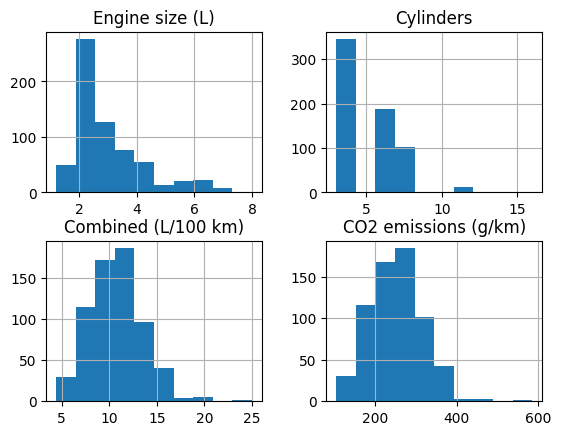

In [60]:
# Histograma
viz = df[['Engine size (L)', 'Cylinders', 'Combined (L/100 km)', 'CO2 emissions (g/km)']]
viz.hist()
plt.show()

- De acordo com os dados, a maioria dos motores tem 4, 6 ou 8 cilindros e tamanhos de motor entre 2 e 4 litros.

- Como você pode esperar, o consumo combinado de combustível e a emissão de CO2 têm distribuições muito semelhantes.